# Titanic Dataset analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [11]:
import os

In [15]:
pwd

'C:\\Users\\shrath\\Desktop\\important\\DataScience_practice_SampleData\\Titanic_dataset_analysis'

In [14]:
os.chdir('C:/Users/shrath/Desktop/important/DataScience_practice_SampleData/Titanic_dataset_analysis')

In [16]:
train = pd.read_csv('train.csv')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

In [18]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


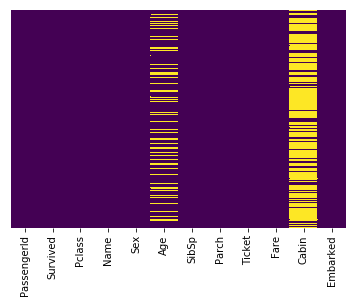

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
sns.set_style('whitegrid')

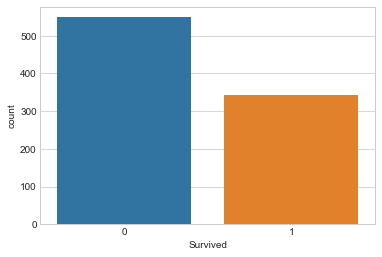

In [25]:
sns.countplot(x='Survived',data=train)

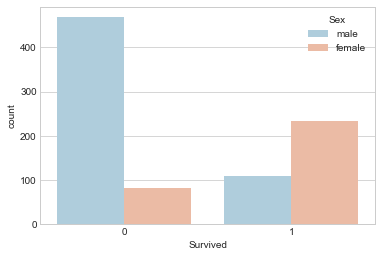

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

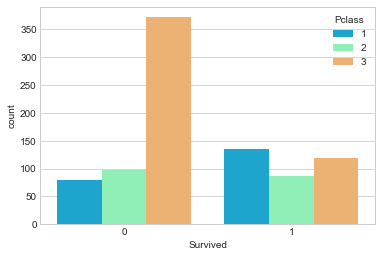

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

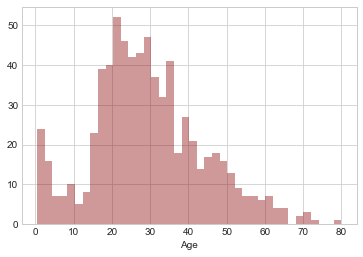

In [33]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

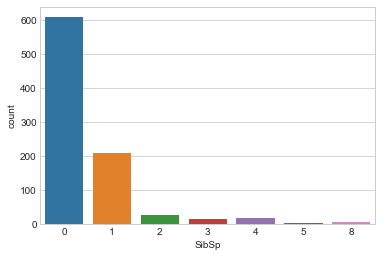

In [34]:
sns.countplot(x='SibSp',data=train)

# Data Cleaning

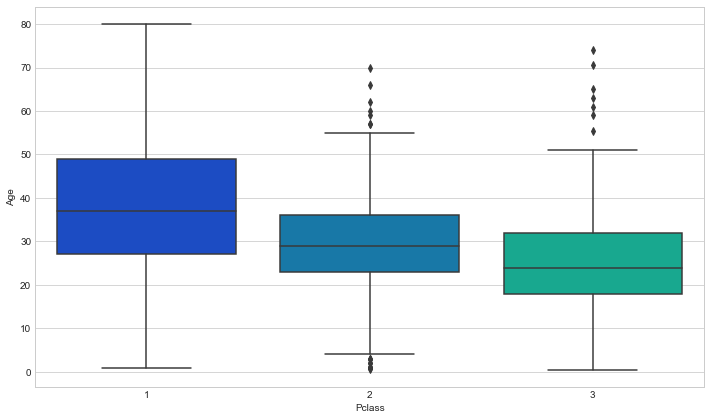

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Assigning mean values of Age to NaN values

In [40]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
    
        elif Pclass == 2:
            return 29
    
        else: 
            return 24
 
    else:
        return Age



Apply the function

In [41]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

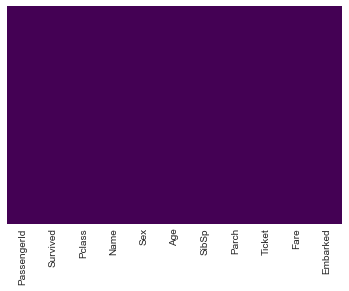

In [48]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
train.drop('Cabin',axis=1,inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
train.dropna(inplace=True)

# Converting Categorial features

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [50]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [51]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [56]:
train=pd.concat([train,Sex,Embarked],axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a logistic regression model

Train-Test split

In [60]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [61]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [64]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,808,3,18.00,0,0,7.7750,0,0,1
651,652,2,18.00,0,1,23.0000,0,0,1
2,3,3,26.00,0,0,7.9250,0,0,1
690,691,1,31.00,1,0,57.0000,1,0,1
196,197,3,24.00,0,0,7.7500,1,1,0
888,889,3,24.00,1,2,23.4500,0,0,1
258,259,1,35.00,0,0,512.3292,0,0,0
39,40,3,14.00,1,0,11.2417,0,0,0
235,236,3,24.00,0,0,7.5500,0,0,1
299,300,1,50.00,0,1,247.5208,0,0,0


In [65]:
y_train

807    0
651    1
2      1
690    1
196    0
888    0
258    1
39     1
235    0
299    1
339    0
881    0
755    1
804    1
267    1
459    0
65     1
623    0
347    1
189    0
29     0
781    1
618    1
681    1
779    1
627    1
425    0
280    0
625    0
424    0
      ..
250    0
842    1
557    0
419    0
59     0
372    0
137    0
507    1
624    0
853    1
49     0
40     0
478    0
5      0
111    0
705    0
733    0
317    0
758    0
886    0
645    1
553    1
394    1
76     0
600    1
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [66]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,512,3,24.0,0,0,8.0500,1,0,1
613,614,3,24.0,0,0,7.7500,1,1,0
615,616,2,24.0,1,2,65.0000,0,0,1
337,338,1,41.0,0,0,134.5000,0,0,0
718,719,3,24.0,0,0,15.5000,1,1,0
152,153,3,55.5,0,0,8.0500,1,0,1
826,827,3,24.0,0,0,56.4958,1,0,1
418,419,2,30.0,0,0,13.0000,1,0,1
614,615,3,35.0,0,0,8.0500,1,0,1
241,242,3,24.0,1,0,15.5000,0,1,0


# Training & Predicting

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
predictions=logmodel.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
accuracy=confusion_matrix(y_test,predictions)

In [75]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy = accuracy_score(y_test,predictions)

In [79]:
accuracy

0.8202247191011236